In [1]:
##Generating Data

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs , make_moons

In [169]:
X,Y = make_blobs?

In [172]:
X,Y = make_moons?

In [ ]:
X,Y = make_moons

In [174]:
X,Y = make_moons(n_samples =1000,shuffle=True,noise=0.2,random_state=1)

In [175]:
plt.scatter?

In [194]:
X,Y = make_blobs(n_samples=500,centers=2, n_features=2,random_state=2)
print(X.shape,Y.shape)

(500, 2) (500,)


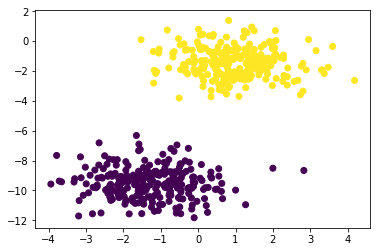

In [195]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [196]:
##Model and helper functions

In [197]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [198]:
sigmoid(2)

z = np.array([1,2,3,4,5])
sigmoid(z)

array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

In [199]:
## Implement Perceptron LEarning Algorithm
# 1- Learn the weights 
# 2- Reduce the predictions
# 3- Make the predictions

In [200]:
def predict(X,weights):
    #HERE x is a m x n+1 matrix and w is n X 1 vector
    z = np.dot(X,weights)
    predictions = sigmoid(z)
    return predictions



def loss(X,Y,weights):
    """Binary Cross Entropy"""
    
    Y_ = predict(X,weights)
    cost = np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    ##Perform weight updates for 1 epoch
    Y_ = predict(X,weights)
    dw = np.dot(X.T,Y_-Y)
    
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

def train(X,Y,learning_rate=0.5,maxEpochs=100):
    
    #modify the input matrix to handle bias 
    ones = np.ones((X.shape[0],1))
    X = np.hstack((ones,X))
    
    #initialize Weights to 0
    weights = np.zeros(X.shape[1])
    
    
    #Iterate over few epochs make updates
    for epoch in range(maxEpochs):
        
        weights = update(X,Y,weights,learning_rate)
        
        if(epoch%10==0):
            l = loss(X,Y,weights)
            print("Epoch %d loss %.4f"%(epoch,l))
            
            
    return weights

In [201]:
weights = train(X,Y,learning_rate=0.8,maxEpochs=2000)

Epoch 0 loss 1.0895
Epoch 10 loss 0.1351
Epoch 20 loss 0.0997
Epoch 30 loss 0.0797
Epoch 40 loss 0.0664
Epoch 50 loss 0.0570
Epoch 60 loss 0.0499
Epoch 70 loss 0.0444
Epoch 80 loss 0.0399
Epoch 90 loss 0.0363
Epoch 100 loss 0.0333
Epoch 110 loss 0.0308
Epoch 120 loss 0.0286
Epoch 130 loss 0.0268
Epoch 140 loss 0.0251
Epoch 150 loss 0.0237
Epoch 160 loss 0.0224
Epoch 170 loss 0.0213
Epoch 180 loss 0.0202
Epoch 190 loss 0.0193
Epoch 200 loss 0.0185
Epoch 210 loss 0.0177
Epoch 220 loss 0.0170
Epoch 230 loss 0.0163
Epoch 240 loss 0.0157
Epoch 250 loss 0.0152
Epoch 260 loss 0.0147
Epoch 270 loss 0.0142
Epoch 280 loss 0.0137
Epoch 290 loss 0.0133
Epoch 300 loss 0.0129
Epoch 310 loss 0.0126
Epoch 320 loss 0.0122
Epoch 330 loss 0.0119
Epoch 340 loss 0.0116
Epoch 350 loss 0.0113
Epoch 360 loss 0.0110
Epoch 370 loss 0.0108
Epoch 380 loss 0.0105
Epoch 390 loss 0.0103
Epoch 400 loss 0.0101
Epoch 410 loss 0.0098
Epoch 420 loss 0.0096
Epoch 430 loss 0.0094
Epoch 440 loss 0.0092
Epoch 450 loss 0.0091

In [202]:
# make predictions
# Visualise Decision Surface 
# Linear vs Non- Linear surface

In [203]:
def getPrediction(X_test,weights,labels=True):
    
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test = np.hstack((ones,X_test))
        
    
    probs = predict(X_test,weights)
    
    if not labels:
        return probs
    else:
        label = np.zeros(probs.shape)
        label[probs>=0.5] = 1
        return label
    

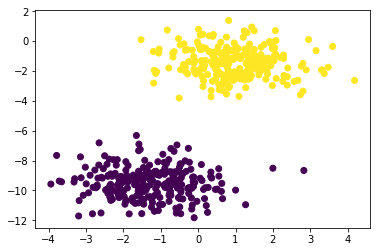

In [204]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [205]:
x1 = np.linspace(-2,2,10)
print(x1)

x2 = -(weights[0] + weights[1]*x1 )/weights[2]
print(x2)

[-2.         -1.55555556 -1.11111111 -0.66666667 -0.22222222  0.22222222
  0.66666667  1.11111111  1.55555556  2.        ]
[-3.77329123 -4.07683738 -4.38038353 -4.68392968 -4.98747583 -5.29102198
 -5.59456813 -5.89811428 -6.20166043 -6.50520658]


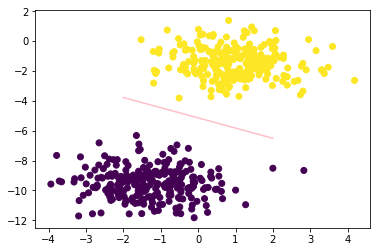

In [206]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,c='pink')
plt.show()

In [207]:
#Finding accuracy
Y_ = getPrediction(X,weights)
#print(Y_)
#print(Y)
#Y_==Y 
training_acc = np.sum(Y==Y_)/Y.shape[0]
print(training_acc)

1.0
